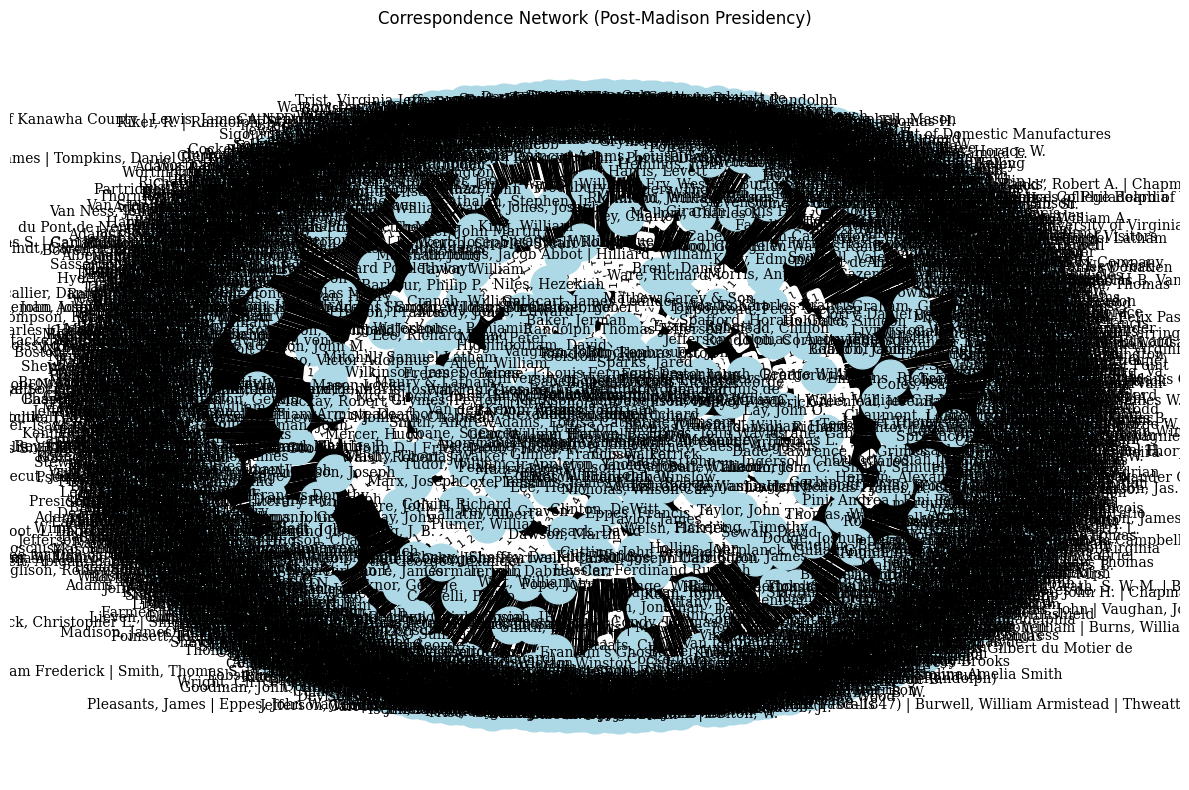

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd

post_madison_df=pd.read_csv("post-madison.csv")

# Filter rows with valid sender and recipient
valid_edges = post_madison_df.dropna(subset=["authors", "recipients"])

# Create a directed graph
G = nx.DiGraph()

# Add edges from authors to recipients
for _, row in valid_edges.iterrows():
    sender = row["authors"].strip()
    recipient = row["recipients"].strip()
    if G.has_edge(sender, recipient):
        G[sender][recipient]["weight"] += 1
    else:
        G.add_edge(sender, recipient, weight=1)

# Set figure size and layout
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, width=1)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="serif")

# Display edge weights
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Correspondence Network (Post-Madison Presidency)")
plt.axis("off")
plt.tight_layout()
plt.savefig("correspondence_network_post_madison.png")
plt.show()


'john_adams_correspondence_animation.gif'

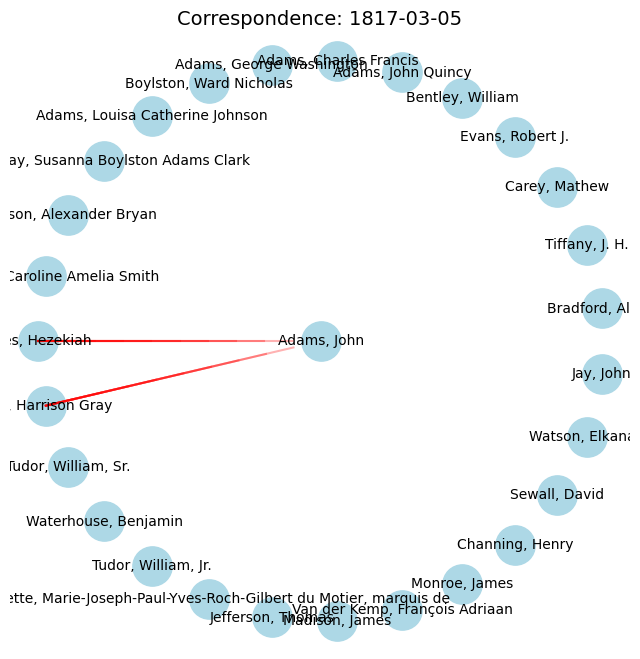

In [4]:
# Re-run all necessary steps after environment reset to generate the animated GIF

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import Counter
import numpy as np

# Load dataset
file_path = "post-madison.csv"
df = pd.read_csv(file_path)
df["date_from"] = pd.to_datetime(df["date_from"])
df["authors"] = df["authors"].str.strip()
df["recipients"] = df["recipients"].str.strip()

# Filter for Adams-related letters
adams_df = df[(df["authors"] == "Adams, John") | (df["recipients"] == "Adams, John")].dropna(subset=["authors", "recipients"])

# Count correspondents with >= 10 messages
correspondents = []
for _, row in adams_df.iterrows():
    if row["authors"] == "Adams, John":
        correspondents.append(row["recipients"])
    else:
        correspondents.append(row["authors"])
top_corr = {k for k, v in Counter(correspondents).items() if v >= 10}

# Filter to those top correspondents
adams_filtered = adams_df[
    ((adams_df["authors"] == "Adams, John") & (adams_df["recipients"].isin(top_corr))) |
    ((adams_df["recipients"] == "Adams, John") & (adams_df["authors"].isin(top_corr)))
].copy()
adams_filtered["date_str"] = adams_filtered["date_from"].dt.strftime("%Y-%m-%d")
dates = sorted(adams_filtered["date_str"].unique())
msgs_by_date = {d: adams_filtered[adams_filtered["date_str"] == d] for d in dates}

# Build graph and layout
G = nx.DiGraph()
for _, r in adams_filtered.iterrows():
    G.add_edge(r["authors"], r["recipients"])
layout = nx.shell_layout(G, nlist=[["Adams, John"], [n for n in G.nodes if n != "Adams, John"]])

# Plot and animate
fig, ax = plt.subplots(figsize=(8, 8))

def draw_frame(i):
    ax.clear()
    date = dates[i]
    ax.set_title(f"Correspondence: {date}", fontsize=14)
    ax.axis("off")
    nx.draw_networkx_nodes(G, layout, ax=ax, node_size=800, node_color="lightblue")
    nx.draw_networkx_labels(G, layout, ax=ax, font_size=10)

    # Animate messages of the day
    day_msgs = msgs_by_date[date]
    for _, row in day_msgs.iterrows():
        src = layout[row["authors"]]
        tgt = layout[row["recipients"]]
        steps = 10
        for j in range(steps):
            interp = src + (tgt - src) * (j / steps)
            ax.plot([src[0], interp[0]], [src[1], interp[1]], color="red", alpha=0.3)

ani = animation.FuncAnimation(fig, draw_frame, frames=len(dates), interval=300, repeat=False)
gif_path = "john_adams_correspondence_animation.gif"
ani.save(gif_path, writer="pillow", fps=3)

gif_path


In [5]:
post_madison_df.index.min()

0

In [6]:
post_madison_df.head()

,Unnamed: 0,title,permalink,project,authors,recipients,date_from,date_to,api,og_text,text,period
0,19849,"To John Adams from Hezekiah Niles, 5 March 1817",https://founders.archives.gov/documents/Adams/...,Adams Papers,"Niles, Hezekiah","Adams, John",1817-03-05,1817-03-05,https://founders.archives.gov/API/docdata/Adam...,"\n\t\t\t\t\n\t\t\t\t\tSir,\n\t\t\t\t\tBaltimor...","Sir, Baltimore, March 5. 1817 I am, indeed, gr...",post-Madison Presidency
1,19850,"To John Adams from Harrison Gray Otis, 5 March...",https://founders.archives.gov/documents/Adams/...,Adams Papers,"Otis, Harrison Gray","Adams, John",1817-03-05,1817-03-05,https://founders.archives.gov/API/docdata/Adam...,"\n\t\t\t\t\n\t\t\t\t\tDear Sir,\n\t\t\t\t\tGeo...","Dear Sir, Georgetown 5 March 1817 I have the s...",post-Madison Presidency
2,19851,"From John Adams to William Tudor, Sr., 8 March...",https://founders.archives.gov/documents/Adams/...,Adams Papers,"Adams, John","Tudor, William, Sr.",1817-03-08,1817-03-08,https://founders.archives.gov/API/docdata/Adam...,\n\nDear Sir\nQuincy March 8th. 1817.\n\n“Vani...,Dear Sir Quincy March 8th. 1817. “Vanity of Va...,post-Madison Presidency
3,19852,"To John Adams from Charles Cushing, 10 March 1817",https://founders.archives.gov/documents/Adams/...,Adams Papers,"Cushing, Charles","Adams, John",1817-03-10,1817-03-10,https://founders.archives.gov/API/docdata/Adam...,\n\t\t\t\t\n\t\t\t\t\tDear Sir\n\t\t\t\t\tRoxb...,Dear Sir Roxbury March 10th: 1817 To my very g...,post-Madison Presidency
4,19853,"From John Adams to Charles Cushing, 13 March 1817",https://founders.archives.gov/documents/Adams/...,Adams Papers,"Adams, John","Cushing, Charles",1817-03-13,1817-03-13,https://founders.archives.gov/API/docdata/Adam...,\n\nDear Sir\nQuincy March 13 1817\n\nThough t...,Dear Sir Quincy March 13 1817 Though the publi...,post-Madison Presidency


In [8]:
post_madison_df["date_from"].min()

'1817-03-04'

In [9]:
post_madison_df["date_from"].max()


'1836-06-28'